In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np
import matplotlib.pyplot as plt

vgg16 = VGG16(input_shape=[100,100,3], include_top = False, weights = 'imagenet')

x = Flatten()(vgg16.output)
x = Dense(4, activation = 'sigmoid')(x) # x1,y1,x2,y2 with values from [0,1]
model = Model(vgg16.input, x)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
def Image_Generator(batch_size = 64):

  while True:

    for _ in range(100):

      X = np.zeros((batch_size, 100, 100, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):

        row_1 = np.random.randint(90)
        col_1 = np.random.randint(90)
        row_2 = np.random.randint(row_1,100)
        col_2 = np.random.randint(col_1,100)

        X[i, row_1:row_2, col_1:col_2, :] = 1
        Y[i,0] = row_1 / 100
        Y[i,1] = col_1 / 100
        Y[i,2] = (row_2 - row_1) / 100 
        Y[i,3] = (col_2 - col_1) / 100 
        
      yield X,Y

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.001))
model.fit(Image_Generator(), steps_per_epoch=100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 22s 170ms/step - loss: 0.5181
Epoch 2/10
100/100 [==============================] - 17s 170ms/step - loss: 0.5059
Epoch 3/10
100/100 [==============================] - 17s 172ms/step - loss: 0.5034
Epoch 4/10
100/100 [==============================] - 17s 173ms/step - loss: 0.5045
Epoch 5/10
100/100 [==============================] - 17s 174ms/step - loss: 0.5031
Epoch 6/10
100/100 [==============================] - 18s 175ms/step - loss: 0.5042
Epoch 7/10
100/100 [==============================] - 18s 177ms/step - loss: 0.5057
Epoch 8/10
100/100 [==============================] - 18s 176ms/step - loss: 0.5029
Epoch 9/10
100/100 [==============================] - 18s 177ms/step - loss: 0.5037
Epoch 10/10
100/100 [==============================] - 18s 177ms/step - loss: 0.5045


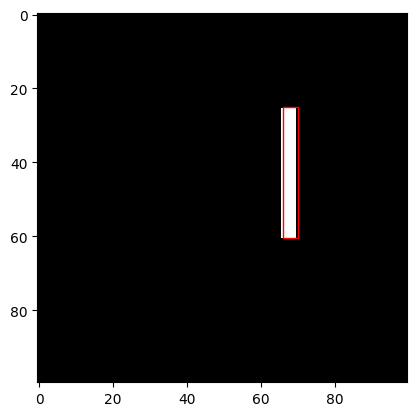

In [ ]:
from matplotlib.patches import Rectangle

x = np.zeros((100,100,3))
row_1 = np.random.randint(90)
col_1 = np.random.randint(90)
row_2 = np.random.randint(row_1,100)
col_2 = np.random.randint(col_1,100)

x[row_1:row_2, col_1:col_2, :] = 1

x = np.expand_dims(x, axis = 0)
p = model.predict(x, verbose = False)[0]

fig, ax = plt.subplots(1)

ax.imshow(x[0])
rect = Rectangle((p[1]*100, p[0]*100), p[3]*100, p[2]*100, linewidth = 1, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect)
plt.show()
